In [159]:
import pandas as pd
import numpy as np

train_df = pd.read_csv("facial-keypoints-detection/training.csv")

train_df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [20]:
train_df.shape

(7049, 31)

In [60]:
train_df.columns

train_df.columns[:-1].tolist()

['left_eye_center_x',
 'left_eye_center_y',
 'right_eye_center_x',
 'right_eye_center_y',
 'left_eye_inner_corner_x',
 'left_eye_inner_corner_y',
 'left_eye_outer_corner_x',
 'left_eye_outer_corner_y',
 'right_eye_inner_corner_x',
 'right_eye_inner_corner_y',
 'right_eye_outer_corner_x',
 'right_eye_outer_corner_y',
 'left_eyebrow_inner_end_x',
 'left_eyebrow_inner_end_y',
 'left_eyebrow_outer_end_x',
 'left_eyebrow_outer_end_y',
 'right_eyebrow_inner_end_x',
 'right_eyebrow_inner_end_y',
 'right_eyebrow_outer_end_x',
 'right_eyebrow_outer_end_y',
 'nose_tip_x',
 'nose_tip_y',
 'mouth_left_corner_x',
 'mouth_left_corner_y',
 'mouth_right_corner_x',
 'mouth_right_corner_y',
 'mouth_center_top_lip_x',
 'mouth_center_top_lip_y',
 'mouth_center_bottom_lip_x',
 'mouth_center_bottom_lip_y']

In [35]:
idx = 0

row = train_df.iloc[idx]
image = row.iloc[-1].split()

keypoints = row.iloc[:-1]
keypoints.values  # array

array([66.0335639098, 39.0022736842, 30.2270075188, 36.4216781955,
       59.582075188, 39.6474225564, 73.1303458647, 39.9699969925,
       36.3565714286, 37.3894015038, 23.4528721805, 37.3894015038,
       56.9532631579, 29.0336481203, 80.2271278195, 32.2281383459,
       40.2276090226, 29.0023218045, 16.3563789474, 29.6474706767,
       44.4205714286, 57.0668030075, 61.1953082707, 79.9701654135,
       28.6144962406, 77.3889924812, 43.3126015038, 72.9354586466,
       43.1307067669, 84.4857744361], dtype=object)

In [47]:
import numpy as np

img = np.array(image, dtype=np.int16)
img = img.reshape((96, 96, 1))

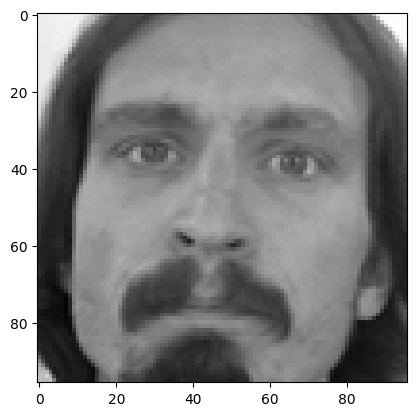

In [55]:
import matplotlib.pyplot as plt

plt.imshow(img, cmap="gray")
# plt.imshow(keypoints.values)
plt.show()

In [44]:
np.sqrt(9216)

96.0

# split_data.py


In [1]:
%%writefile split_data.py

### split dataframe: train and val

import pandas as pd

def manual_split_training_data():

    train_df = pd.read_csv("training.csv")
    # test_df = pd.read_csv("facial-keypoints-detection/test.csv")

    train_15_landmarks = train_df[~(train_df.isnull().sum(axis=1) > 20)].copy()
    train_4_landmarks = train_df[(train_df.isnull().sum(axis=1) > 20)].copy()

    # train_15_landmarks.shape, train_4_landmarks.shape

    train_15_landmarks.iloc[0:100, :].to_csv("val_15.csv", index=False)
    train_15_landmarks.iloc[100:, :].to_csv("train_15.csv", index=False)

    train_4_landmarks.iloc[0:200, :].to_csv("val_4.csv", index=False)
    train_4_landmarks.iloc[200:, :].to_csv("train_4.csv", index=False)


Overwriting split_data.py


In [166]:
manual_split_training_data()

# config.py


In [16]:
%%writefile config.py


import torch
from dataclasses import dataclass

@dataclass
class CONFIG:
    DEVICE: str = "mps" if torch.backends.mps.is_built() else "cpu"
    LR: float = 1e-4
    WEIGHT_DECAY: float = 5e-4
    BATCH_SIZE: int = 64
    NUM_EPOCHS: int = 5
    CHECKPOINT_FILE: str = "b0_4.pth.tar"
    SAVE_MODEL: bool = True


config = CONFIG()

Overwriting config.py


# data_augs.py


In [17]:
%%writefile data_augs.py

import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2

# Data Augmentations
train_transforms = A.Compose(
    [
        A.Resize(width=96, height=96),
        A.Rotate(limit=15, border_mode=cv2.BORDER_CONSTANT, p=0.8),
        A.Affine(shear=15, scale=1.0, mode=0, p=0.2),
        A.RandomBrightnessContrast(contrast_limit=0.5, brightness_limit=0.5, p=0.2),
        A.OneOf(
            [
                A.GaussNoise(p=0.8),
                A.CLAHE(p=0.8),
                A.ImageCompression(p=0.8),
                A.RandomGamma(p=0.8),
                A.Posterize(p=0.8),
                A.Blur(p=0.8),
            ],
            p=1.0,
        ),
        A.ShiftScaleRotate(
            shift_limit=0.1,
            scale_limit=0.1,
            rotate_limit=0,
            p=0.2,
            border_mode=cv2.BORDER_CONSTANT,
        ),
        A.Normalize(
            mean=[0.4897, 0.4897, 0.4897],
            std=[0.2330, 0.2330, 0.2330],
            max_pixel_value=255.0,
        ),
        ToTensorV2(),
    ],
    keypoint_params=A.KeypointParams(format="xy", remove_invisible=False),
)


# Data Augmentations

val_transforms = A.Compose(
    [
        A.Resize(width=96, height=96),
        A.Normalize(
            mean=[0.4897, 0.4897, 0.4897],
            std=[0.2330, 0.2330, 0.2330],
            max_pixel_value=255.0,
        ),
        ToTensorV2(),
    ],
    keypoint_params=A.KeypointParams(format="xy", remove_invisible=False),
)

Overwriting data_augs.py


# dataset.py


In [144]:
%%writefile dataset.py

import pandas as pd
import numpy as np
import torch

import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset

from config import CONFIG
from data_augs import train_transforms, val_transforms


class FacialKeypointDataset(torch.utils.data.Dataset):

    def __init__(self, csv_file, train=True, transform=None):
        super().__init__()
        self.df = pd.read_csv(csv_file)
        self.category_names = [
            'left_eye_center_x',
            'left_eye_center_y',
            'right_eye_center_x',
            'right_eye_center_y',
            'left_eye_inner_corner_x',
            'left_eye_inner_corner_y',
            'left_eye_outer_corner_x',
            'left_eye_outer_corner_y',
            'right_eye_inner_corner_x',
            'right_eye_inner_corner_y',
            'right_eye_outer_corner_x',
            'right_eye_outer_corner_y',
            'left_eyebrow_inner_end_x',
            'left_eyebrow_inner_end_y',
            'left_eyebrow_outer_end_x',
            'left_eyebrow_outer_end_y',
            'right_eyebrow_inner_end_x',
            'right_eyebrow_inner_end_y',
            'right_eyebrow_outer_end_x',
            'right_eyebrow_outer_end_y',
            'nose_tip_x',
            'nose_tip_y',
            'mouth_left_corner_x',
            'mouth_left_corner_y',
            'mouth_right_corner_x',
            'mouth_right_corner_y',
            'mouth_center_top_lip_x',
            'mouth_center_top_lip_y',
            'mouth_center_bottom_lip_x',
            'mouth_center_bottom_lip_y'
            ]
        self.transform = transform
        self.train = train

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):

        image = self.df.iloc[idx, -1]
        image = image.split()
        image = np.array(image).astype(np.float32)  # shape: (9216,)

        if self.train:
            labels = np.array(self.df.iloc[idx, :-1].tolist())
            labels[np.isnan(labels)] = -1  # shape: (30,)
        else:
            # keypoints_dim = len(self.df.columns[:-1].tolist())
            labels = np.zeros(30)  # shape: (30,)

        ignore_indices = labels == -1
        labels = labels.reshape(15, 2)  # xy

        if self.transform:
            image = np.repeat(image.reshape(96, 96, -1), 3, 2).astype(
                np.uint8
            )  # shape: (96, 96, 3)
            augmentations = self.transform(image=image, keypoints=labels)
            image = augmentations["image"]  # shape: (3, 96, 96)
            labels = augmentations["keypoints"]  # shape: (30,)

        labels = np.array(labels).reshape(-1)
        labels[ignore_indices] = -1

        return image, labels.astype(np.float32)

Overwriting dataset.py


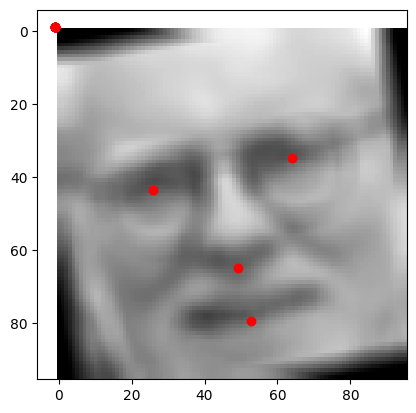

In [121]:
ds = FacialKeypointDataset(
    csv_file="facial-keypoints-detection/training.csv",
    train=True,
    transform=train_transforms,
)

loader = DataLoader(ds, batch_size=CONFIG().BATCH_SIZE, shuffle=True)

for idx, (x, y) in enumerate(loader):
    plt.imshow(x[0][0].detach().cpu().numpy(), cmap="gray")
    plt.plot(y[0][0::2].detach().cpu().numpy(), y[0][1::2].detach().cpu().numpy(), "ro")
    plt.show()
    break

# Testing


In [167]:
train_ds = FacialKeypointDataset(
    csv_file="train_4.csv", transform=train_transforms, train=True
)
train_loader = DataLoader(train_ds, batch_size=config.BATCH_SIZE, shuffle=True)

val_ds = FacialKeypointDataset(
    csv_file="val_4.csv", transform=val_transforms, train=False
)
val_loader = DataLoader(val_ds, batch_size=config.BATCH_SIZE, shuffle=False)

test_ds = FacialKeypointDataset(
    csv_file="facial-keypoints-detection/test.csv",
    transform=val_transforms,
    train=False,
)

test_loader = DataLoader(test_ds, batch_size=config.BATCH_SIZE, shuffle=False)

In [168]:
train = True

train_df = pd.read_csv("train_4.csv")

train_df.head()
# image = train_df.iloc[idx, -1]
# image = image.split()
# image = np.array(image).astype(np.float32)  # shape: (9216,)

# if train:
#     labels = np.array(train_df.iloc[idx, :-1].tolist())
#     labels[np.isnan(labels)] = -1  # shape: (30,)
#     print(labels.shape)
# else:
#     # keypoints_dim = len(self.df.columns[:-1].tolist())
#     labels = np.zeros(30)  # shape: (30,)
#     print(labels.shape)

# ignore_indices = labels == -1
# labels = labels.reshape(15, 2)  # xy
# print(labels.shape)

,Unnamed: 0,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,2484,50.062656,47.169562,11.844672,41.795155,NaN,NaN,NaN,NaN,NaN,...,72.847277,NaN,NaN,NaN,NaN,NaN,NaN,24.982080,86.581824,177 174 167 150 122 106 93 101 115 112 105 95 ...
1,2485,60.342486,41.523010,30.932238,41.090491,NaN,NaN,NaN,NaN,NaN,...,60.553116,NaN,NaN,NaN,NaN,NaN,NaN,45.637362,66.608147,205 205 204 202 202 201 201 203 205 206 207 20...
2,2486,65.764855,32.717869,29.322873,39.674978,NaN,NaN,NaN,NaN,NaN,...,68.166000,NaN,NaN,NaN,NaN,NaN,NaN,53.838382,75.454364,128 141 132 145 140 148 184 214 216 221 227 22...
3,2487,65.648410,36.341927,28.433082,36.725583,NaN,NaN,NaN,NaN,NaN,...,62.430991,NaN,NaN,NaN,NaN,NaN,NaN,46.081586,70.488000,25 22 20 20 21 25 27 29 32 41 51 57 60 60 56 5...
4,2488,65.284843,36.367308,30.860774,37.527697,NaN,NaN,NaN,NaN,NaN,...,62.282119,NaN,NaN,NaN,NaN,NaN,NaN,47.492670,73.885751,59 57 63 58 53 59 58 60 86 76 58 48 42 38 50 6...


In [153]:
batch_img, batch_targets = next(iter(train_loader))

ValueError: cannot reshape array of size 31 into shape (15,2)

In [147]:
from tqdm import tqdm
import torch
from efficientnet_pytorch import EfficientNet


def train_one_epoch(loader, model, optimizer, loss_fn, device):
    losses = []
    loop = tqdm(loader)
    num_examples = 0

    for batch_idx, (data, targets) in enumerate(loop):
        data = data.to(device)
        targets = targets.to(device)

        # forward
        scores = model(data)
        scores[targets == -1] = -1
        loss = loss_fn(scores, targets)
        num_examples += torch.numel(scores[targets != -1])
        loss.append(loss.item())

        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Loss average over epoch: {(sum(losses)/num_examples) ** 0.5}")


config = CONFIG()

loss_fn = torch.nn.MSELoss(reduction="sum")
model = EfficientNet.from_pretrained("efficientnet-b0")
model._fc = torch.nn.Linear(1280, 30)
model = model.to(config.DEVICE)
optimizer = torch.optim.Adam(
    model.parameters(), lr=config.LR, weight_decay=config.WEIGHT_DECAY
)

train_one_epoch(train_loader, model, optimizer, loss_fn, config.DEVICE)

Loaded pretrained weights for efficientnet-b0


  0%|          | 0/72 [00:00<?, ?it/s]


ValueError: cannot reshape array of size 31 into shape (15,2)

In [142]:
ds.category_names.index("left_eye_center_x")

0

In [114]:
for idx, (batch_imgs, batch_labels) in enumerate(loader):
    break


batch_imgs.shape, batch_labels.shape

(torch.Size([64, 3, 96, 96]), torch.Size([64, 30]))

In [100]:
np.zeros(30).shape

(30,)

In [99]:
len(train_df.columns[:-1].tolist())

30

In [103]:
train_df.iloc[idx, -1]
train_df.iloc[idx, -1].split()
np.array(train_df.iloc[idx, -1].split())
image = np.array(train_df.iloc[idx, -1].split()).astype(np.float32)
image.shape

(9216,)

In [101]:
labels = np.array(train_df.iloc[idx, :-1].tolist())
labels[np.isnan(labels)] = -1
labels.shape

ignore_indices = labels == -1
ignore_indices

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [104]:
image = np.repeat(image.reshape(96, 96, -1), 3, 2).astype(np.uint8)
image.shape

(96, 96, 3)

# utils.py


In [169]:
%%writefile utils.py

import torch
import numpy as np
import pandas as pd
from tqdm import tqdm

from config import CONFIG

config = CONFIG()


def get_submission(loader, dataset, model_15, model_4):

    model_15.eval()
    model_4.eval()

    id_lookup = pd.read_csv("facial-keypoints-detection/IdLookupTable.csv")
    predictions = []
    image_id = 1

    for image, label in tqdm(loader):
        image = image.to(config.DEVICE)
        pred_15 = torch.clip(model_15(image).unsqueeze(dim=0), 0.0, 96.0)
        pred_4 = torch.clip(model_4(image).unsqueeze(dim=0), 0.0, 96.0)
        feature_names = id_lookup.loc[id_lookup["ImageId"] == image_id]["FeatureName"]

        for feature_name in feature_names:
            feature_index = dataset.category_names.index(feature_name)
            if feature_names.shape[0] < 10:
                predictions.append(pred_4[feature_index].item())
            else:
                predictions.append(pred_15[feature_index].item())

        image_id += 1

    df = pd.DataFrame(
        {"RowId": np.arange(1, len(predictions) + 1), "Location": predictions}
    )
    df.to_csv("submission.csv", index=False)

    model_15.train()
    model_4.train()


def get_rmse(loader, model, loss_fn, device):
    model.eval()
    num_examples = 0
    losses = []
    for batch_idx, (data, targets) in enumerate(loader):
        data = data.to(device=device)
        targets = targets.to(device)

        # forward
        scores = model(data)
        loss = loss_fn(scores[targets != -1], targets[targets != -1])
        num_examples += scores[targets != -1].shape[0]

    model.train()
    print(f"Loss on val: {(sum(losses)/ num_examples) ** 0.5}")


def save_checkpoint(state, filename="my_checkpoint.pth.tar"):
    print("=> Saving checkpoint")
    torch.save(state, filename)


def load_checkpoint(checkpoint, model, optimizer, lr):
    print("=> Loading checkpoint")
    model.load_state_dict(checkpoint["state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer"])

    for param_group in optimizer.param_groups:
        param_group["lr"] = lr


Overwriting utils.py


In [138]:
keypoints_dim = 30
labels = np.zeros(keypoints_dim)  # shape: (30,)
print(labels.shape)

ignore_indices = labels == -1
labels = labels.reshape(15, 2)  # xy
print(labels.shape)

(30,)
(15, 2)
